In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from numpy.random import randn, seed
from scipy.optimize import minimize


El objetivo del examen final es construir un portafolio riesgoso con 7 acciones e invertir en un
portafolio
completo que maximice tu utilidad
.
Considera una tasa libre de riesgo de 5.0%
,
un premio
por riesgo de mercado de 10.0%
y un nivel de aversión al riesgo A=3

In [2]:
data = pd.read_excel("./Prueba.xlsx", index_col=0)
data.head()

,KIMBERA MF Equity,GAPB MF Equity,CEMEXCPO MF Equity,ASURB MF Equity,GFNORTEO MF Equity,KOFUBL MF Equity,AC* MF Equity,LABB MF Equity,FEMSAUBD MF Equity,OMAB MF Equity,...,MEGACPO MF Equity,GCC* MF Equity,BIMBOA MF Equity,GMEXICOB MF Equity,GCARSOA1 MF Equity,TLEVICPO MF Equity,ALFAA MF Equity,BSMXB MF Equity,PINFRA* MF Equity,MEXBOL INDEX
DATE,,,,,,,,,,,,,,,,,,,,,
2016-01-01,40.37,152.05,8.72,243.89,94.99,123.90,104.68,13.85,161.63,83.61,...,64.19,44.81,45.95,36.79,70.98,94.34,34.10,30.25,202.73,42977.50
2016-01-04,39.16,148.57,8.43,238.29,91.79,120.29,102.09,14.41,157.62,81.77,...,64.45,43.51,45.02,35.71,69.83,92.62,33.74,29.46,202.93,42113.70
2016-01-05,38.89,147.93,8.31,233.03,91.72,118.82,101.12,13.77,157.80,81.58,...,63.16,43.51,45.77,36.45,70.70,91.89,33.99,29.72,203.56,42041.68
2016-01-06,39.13,146.99,8.29,231.97,91.63,120.32,102.50,13.65,156.37,82.03,...,63.27,43.51,45.97,35.57,70.47,90.41,33.65,29.67,199.80,41691.19
2016-01-07,39.16,141.32,7.64,230.71,89.54,120.20,101.16,13.25,155.14,80.94,...,62.78,42.76,46.18,35.01,68.15,90.23,31.46,28.50,196.75,40661.57


In [3]:
data.columns = [col.replace("MF Equity", "").strip() for col in data.columns]


In [4]:
data.columns

Index(['KIMBERA', 'GAPB', 'CEMEXCPO', 'ASURB', 'GFNORTEO', 'KOFUBL', 'AC*',
       'LABB', 'FEMSAUBD', 'OMAB', 'GFINBURO', 'AMXL', 'ALSEA*', 'ORBIA*',
       'PE&OLES*', 'GRUMAB', 'RA', 'WALMEX*', 'BOLSAA', 'LIVEPOLC', 'GENTERA*',
       'IENOVA*', 'CUERVO*', 'ELEKTRA*', 'BBAJIOO', 'ALPEKA', 'MEGACPO',
       'GCC*', 'BIMBOA', 'GMEXICOB', 'GCARSOA1', 'TLEVICPO', 'ALFAA', 'BSMXB',
       'PINFRA*', 'MEXBOL INDEX'],
      dtype='object')

In [5]:
acciones = ["ASURB","GFNORTEO", "PE&OLES*", "WALMEX*", "IENOVA*",
           "ELEKTRA*", "PINFRA*"]
indice = ["MEXBOL INDEX"]
rend = data[acciones+indice]
rend = rend.pct_change().dropna()


In [6]:
rend.columns

Index(['ASURB', 'GFNORTEO', 'PE&OLES*', 'WALMEX*', 'IENOVA*', 'ELEKTRA*',
       'PINFRA*', 'MEXBOL INDEX'],
      dtype='object')

In [7]:
rend.head()

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*,PINFRA*,MEXBOL INDEX
DATE,,,,,,,,
2016-01-04,-0.022961,-0.033688,-0.007448,-0.014946,0.008847,-0.028018,0.000987,-0.020099
2016-01-05,-0.022074,-0.000763,0.003127,-0.004202,-0.020554,-0.030183,0.003105,-0.001710
2016-01-06,-0.004549,-0.000981,-0.021366,-0.006564,-0.007555,-0.040974,-0.018471,-0.008337
2016-01-07,-0.005432,-0.022809,0.001506,-0.056395,0.019312,-0.024835,-0.015265,-0.024696
2016-01-08,-0.004118,-0.007706,-0.003180,0.026007,-0.017148,-0.013617,-0.019416,-0.009744


In [8]:
rend.tail()

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*,PINFRA*,MEXBOL INDEX
DATE,,,,,,,,
2019-12-30,-0.005868,-0.035990,0.004562,-0.026240,-0.008777,0.003914,-0.017965,-0.013647
2019-12-31,-0.000056,0.006190,-0.010780,-0.000554,0.022654,-0.001438,0.000155,-0.002668
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.018190,0.037956,0.042480,0.017913,-0.013156,-0.000627,0.016947,0.020583
2020-01-03,0.004910,0.002736,0.020423,-0.007801,0.016636,-0.002681,0.017884,0.004222


In [9]:
rend_diario_rpc = rend[acciones].mean() 
rend_anual_rpc = rend_diario_rpc*252

#### Rendimiento esperado diario y anual bajo el *modelo de rendimiento promedio constante*

In [10]:
rend_diario_rpc

ASURB       0.000490
GFNORTEO    0.000313
PE&OLES*    0.000441
WALMEX*     0.000327
IENOVA*     0.000313
ELEKTRA*    0.001455
PINFRA*     0.000081
dtype: float64

In [11]:
rend_anual_rpc

ASURB       0.123539
GFNORTEO    0.078811
PE&OLES*    0.111053
WALMEX*     0.082426
IENOVA*     0.078997
ELEKTRA*    0.366774
PINFRA*     0.020384
dtype: float64

### Modelo CAPM
**Calculo de Betas**

In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
betas = []
for accion in acciones:
    lr = LinearRegression()
    lr.fit(rend[indice], rend[accion])  
    betas.append(lr.coef_[0])
betas = pd.Series(betas,index=acciones)
betas

ASURB       0.916168
GFNORTEO    1.522509
PE&OLES*    1.028072
WALMEX*     0.885452
IENOVA*     0.724665
ELEKTRA*    0.376368
PINFRA*     0.726224
dtype: float64

#### Rendimiento esperado diario y anual bajo el *modelo CAPM*

In [14]:
rend_anual_capm = 0.05+betas*.1
rend_anual_capm

ASURB       0.141617
GFNORTEO    0.202251
PE&OLES*    0.152807
WALMEX*     0.138545
IENOVA*     0.122467
ELEKTRA*    0.087637
PINFRA*     0.122622
dtype: float64

In [15]:
rend_diario_capm = rend_anual_capm/252
rend_diario_capm

ASURB       0.000562
GFNORTEO    0.000803
PE&OLES*    0.000606
WALMEX*     0.000550
IENOVA*     0.000486
ELEKTRA*    0.000348
PINFRA*     0.000487
dtype: float64

#### Clasificación de acciones entre defensivas y agresivas

In [16]:
Acciones_Defensivas = betas[betas < 1]
Acciones_Defensivas.index

Index(['ASURB', 'WALMEX*', 'IENOVA*', 'ELEKTRA*', 'PINFRA*'], dtype='object')

In [17]:
Acciones_Ofensivas = betas[betas > 1]
Acciones_Ofensivas.index

Index(['GFNORTEO', 'PE&OLES*'], dtype='object')

#### Calculo de matriz varianza-covarianza

In [18]:
var_cov_anual = rend[acciones].cov()*252
var_cov_anual

,ASURB,GFNORTEO,PE&OLES*,WALMEX*,IENOVA*,ELEKTRA*,PINFRA*
ASURB,0.056395,0.021719,0.015274,0.009059,0.011079,0.006141,0.015996
GFNORTEO,0.021719,0.086023,0.023718,0.020604,0.020555,0.005846,0.019874
PE&OLES*,0.015274,0.023718,0.138051,0.010318,0.011368,0.005504,0.012246
WALMEX*,0.009059,0.020604,0.010318,0.054222,0.010804,0.007108,0.008645
IENOVA*,0.011079,0.020555,0.011368,0.010804,0.056846,0.006021,0.011107
ELEKTRA*,0.006141,0.005846,0.005504,0.007108,0.006021,0.107935,0.006549
PINFRA*,0.015996,0.019874,0.012246,0.008645,0.011107,0.006549,0.046491


### Utilizando los rendimientos esperados bajo el modelo CAPM, construye**

In [19]:
def port_rend(weights):
    E_p =(rend_anual_capm @ weights) 
    return E_p
def port_vol(weights):
    S_p = np.sqrt(weights.T @ (var_cov_anual) @ weights)
    return S_p

In [20]:
def sum_weights(weights):
    return weights.sum() -1 # == 0
def rend_esperado(w, E):
    return port_rend(w) - E # == 0

### Cálculo de cartera de mínima varianza y frontera eficiente

In [21]:
rmin = rend_anual_capm.min()
rmax = rend_anual_capm.max()

In [22]:
rend_maxs = np.linspace(rmin,rmax)
rend_maxs

array([0.08763682, 0.08997588, 0.09231494, 0.094654  , 0.09699307,
       0.09933213, 0.10167119, 0.10401025, 0.10634931, 0.10868838,
       0.11102744, 0.1133665 , 0.11570556, 0.11804462, 0.12038368,
       0.12272275, 0.12506181, 0.12740087, 0.12973993, 0.13207899,
       0.13441806, 0.13675712, 0.13909618, 0.14143524, 0.1437743 ,
       0.14611337, 0.14845243, 0.15079149, 0.15313055, 0.15546961,
       0.15780868, 0.16014774, 0.1624868 , 0.16482586, 0.16716492,
       0.16950399, 0.17184305, 0.17418211, 0.17652117, 0.17886023,
       0.1811993 , 0.18353836, 0.18587742, 0.18821648, 0.19055554,
       0.19289461, 0.19523367, 0.19757273, 0.19991179, 0.20225085])

In [23]:
pesos_optimos = []
N, M  = rend[acciones].shape
np.random.seed(5)
w0 = np.random.randn(M)
for e in rend_maxs:
    constraints = [
        {"type":"eq", "fun":sum_weights},
        {"type":"eq", "fun":lambda w: rend_esperado(w, e)}
    ]
    port1 = minimize(port_vol, w0, constraints=constraints)
    w_opt = port1.x
    pesos_optimos.append(w_opt)

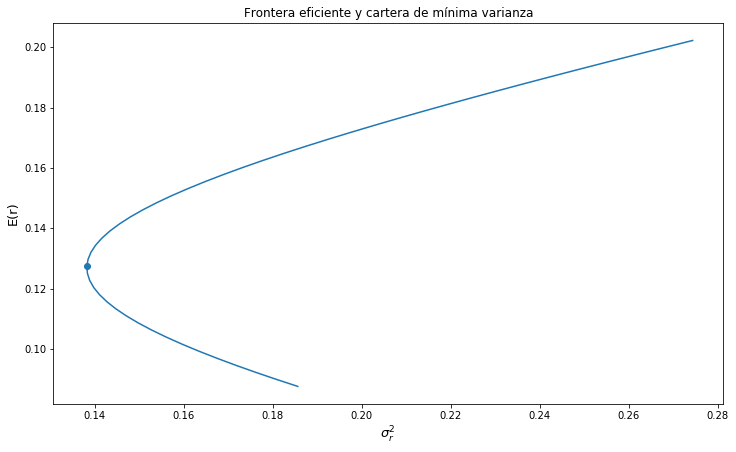

In [24]:
r_opt = []
v_opt = []
for w in pesos_optimos:
    r_opt.append(port_rend(w))
    v_opt.append(port_vol(w))
    
r_opt = np.array(r_opt)
v_opt = np.array(v_opt)

plt.figure(figsize=(12,7))
plt.plot(v_opt,r_opt)
plt.scatter(v_opt[np.argmin(v_opt)],r_opt[np.argmin(v_opt)],)
plt.xlabel(r"$\sigma^2_r$", fontsize=13)
plt.ylabel("E(r)",fontsize=13);
plt.title("Frontera eficiente y cartera de mínima varianza");

### Cálculo de portafolio riesgoso óptimo, aquel que maximiza el coeficiente de *Sharpe*

In [25]:
N, M  = rend[acciones].shape
w0 = np.random.randn(M)
rf = .05
def min_func_sharpe(weights):
        return - (port_rend(weights) - rf)/ port_vol(weights)

constraints = [
    {"type":"eq", "fun":sum_weights}
]
f_sharpe = minimize(min_func_sharpe,w0, constraints=constraints)
w_sharpe = f_sharpe.x
w_sharpe

array([0.18756757, 0.26390329, 0.08257847, 0.21485191, 0.10035608,
       0.0303042 , 0.12043848])

In [26]:
e_sharpe = port_rend(w_sharpe)
vol_sharpe = port_vol(w_sharpe)
e_sharpe, vol_sharpe

(0.15203716115815094, 0.15915070024326172)

### Cálculo de porcentaje a invertir en el portafolio riesgoso óptimo y en el activo libre de riesgo

In [27]:
A = 3
y_star = (e_sharpe - rf) / (A * vol_sharpe ** 2)
y_star

1.342826814610986

In [28]:
E_util = rf+y_star*(e_sharpe-rf)
V_util = y_star*vol_sharpe

In [29]:
print(f"E[u]={E_util:0.3}")
print(f"V[u]={V_util:0.3}")

E[u]=0.187
V[u]=0.214


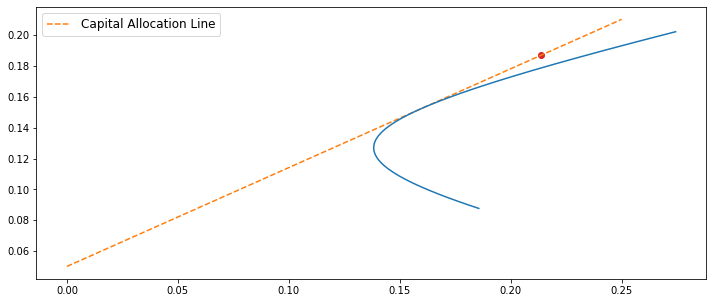

In [30]:
sigma_c = np.linspace(0,0.25)
sharpe = rf+sigma_c*(e_sharpe-rf)/vol_sharpe
plt.figure(figsize=(12,5))
plt.plot(sigma_c, sharpe, linestyle="--", c="tab:orange", label = "Capital Allocation Line")
plt.plot(v_opt,r_opt)
plt.scatter(V_util,E_util,c="tab:red")
plt.legend(fontsize=12);

**¿En qué escenarios ocuparías una red neuronal?**  

*R.- Cuando se tiene una gran cantidad de datos, millones, pues sea ha comprobado que cuando se tienen "pocos" datos, las redes neuronales tienen un peor desempeño en comparación con modelos más simples. También es siempre recomendable, intentar ajustar previamente, modelos más simples* 

**¿En qué escenarios no ocuparías una red neuronal?**  

*R.- Cuando se tienen muy pocos datos* 

**Menciona tres funciones de activación para una red neuronal feed-forward**  

*R.- ReLu (Rectified Lineal Unit), Sigmoid, Tanh (Tangent Hyperbolic)* 

**¿Qué es el método de backpropagation?**  

*R.- También conocido como backwar propagation errors, es un algoritmo, para el cual, dada una red neuronal y una función de costo, calcula el gradiente de la función de costo con respecto a los pesos de la red neuronal. El término backwards, proviene del hecho de que el calculo del gradiente, se obtiene de adelante hacia atrás, es decir, primero se calcula el gradiente asociado a la última capa de la red, y el gradiente de la primera capa de la red se calcula hasta el final*

**¿En qué difiere una red neuronal feed-forward de una red neuronal convolucional?**  

*R.- Una red neuronal convolucional, es un tipo de red neuronal que tiene alguna capa, o todas, convolucionadas (filtro). Por otro lado, las FFNN, son redes no recursivas, es decir, las neuronas en las distintas capas están conectadas únicamente con neuronas de la siguiente capa y además, no forman ciclos, en el caso de que formen ciclos, entonces se conocen como redes neuronales recurrentes. Se puede hacer, que cualquier CNN sea FFNN o RNN, depende de la arquitectura que se desea.*